<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/Analytics/Data301_ML_Mid_Term_Test_Bruno_Tucci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset background

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

# Data Acquisition

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris_data = load_iris()

In [3]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Environment Set Up

In [6]:
# Import all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# EDA (Exploratory Data Analysis)

Only basic EDA (plots)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


BT: there are no null values in this dataset. 

In [10]:
df.shape

(150, 4)

BT: The dataset consists of is 150 rows and 4 columns. 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


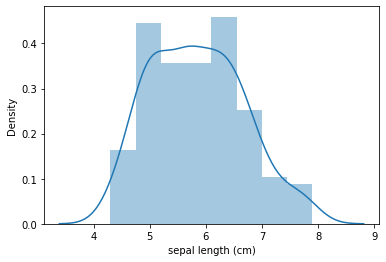

In [13]:
sns.distplot(df['sepal length (cm)'])

BT: Distribution plot of sepal length

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


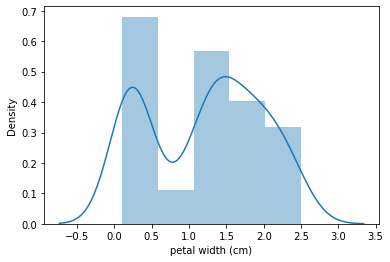

In [14]:
sns.distplot(df['petal width (cm)'])

BT: Distribution plot of petal width

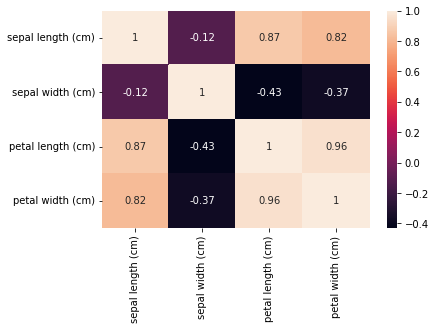

In [17]:
cmatrix = df.corr().round(2)
sns.heatmap(data = cmatrix, annot=True)

BT: The heatmap shows that petal length and Petal width shows the highest correlation, as indicated by a coefficient of determination (R2) of .96. Sepal length and petal length are also strongly correlated (.87). 

# ML - Model Building

## Algorithm # 1 - Logistic Regression

## Scenario 1: Build a model using Sepal Attributes only

*   sepal length (cm)
*   sepal width (cm) *italicized text*



In [18]:
X = df[['sepal length (cm)', 'sepal width (cm)']]

In [19]:
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [24]:
Y = iris_data.target_names

In [27]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
Y = iris_data.target

In [29]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
Y.shape

(150,)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logReg = LogisticRegression()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 2)
(38, 2)
(112,)
(38,)


In [38]:
logReg.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred = logReg.predict(x_test)

In [40]:
y_pred

array([2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0,
       1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2])

In [41]:
y_test

array([1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0,
       1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2])

In [42]:
logReg.score(x_test, y_test)

0.7894736842105263

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, y_pred)

0.7894736842105263

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 10,  2],
       [ 0,  6,  5]])

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.83      0.71        12
           2       0.71      0.45      0.56        11

    accuracy                           0.79        38
   macro avg       0.78      0.76      0.76        38
weighted avg       0.80      0.79      0.78        38



BT Conclusion: The F1 score of .79 shows that the combination of sepal length and sepal with was a strong predictor of petal name (there were 3 petal names). F1 considers both precision an recall and diminished extreme values for each.  

## Scenario 2: Build a model using Petal Attributes only

*   petal length (cm)
*   petal width (cm)

In [ ]:
# hint
# X= iris_data.data[:,2:]
# y=iris_data.target

In [49]:
X2 = df[['petal length (cm)', 'petal width (cm)']]

In [50]:
Y2 = iris_data.target

In [51]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,Y2)

In [52]:
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(112, 2)
(38, 2)
(112,)
(38,)


In [53]:
logReg.fit(x_train2, y_train2)

LogisticRegression()

In [54]:
y_pred2 = logReg.predict(x_test2)

In [55]:
y_test2

array([0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2])

In [56]:
logReg.score(x_test2, y_test2)

0.9473684210526315

BT: The logReg score for petal length and width (.947) was higher than the logReg score for sepal length and width (.789)

In [59]:
accuracy_score(y_test2, y_pred2)

0.9473684210526315

In [60]:
confusion_matrix(y_test2, y_pred2)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 12]])

In [61]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



BT Conclusion: the petal width and length was a better predictor of the three petal names than 
was sepal width and length, as indicated by the F1 score of .95 vs .79, respectively. 

## Scenario 3: Build a model using Sepal and Petal Attributes (all attributes)

*   sepal length (cm)
*   sepal width (cm)
*   petal length (cm)
*   petal width (cm)

In [62]:
X3 = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [65]:
Y3 = iris_data.target

In [66]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3,Y3)

In [67]:
print(x_train3.shape)
print(x_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [68]:
logReg.fit(x_train3, y_train3)

LogisticRegression()

In [70]:
y_pred3 = logReg.predict(x_test3)

In [71]:
logReg.score(x_test3, y_test3)

0.9473684210526315

In [72]:
accuracy_score(y_test3, y_pred3)

0.9473684210526315

In [73]:
confusion_matrix(y_test3, y_pred3)

array([[15,  0,  0],
       [ 0, 13,  1],
       [ 0,  1,  8]])

In [74]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        14
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



BT Conclusion: Adding sepal length and sepal width did not improve the predictive abilities of petal length and width with regard to flower name, i.e. the F1 score of .95 was the same with or without sepal length and width. 

In [79]:
logmodel = logReg

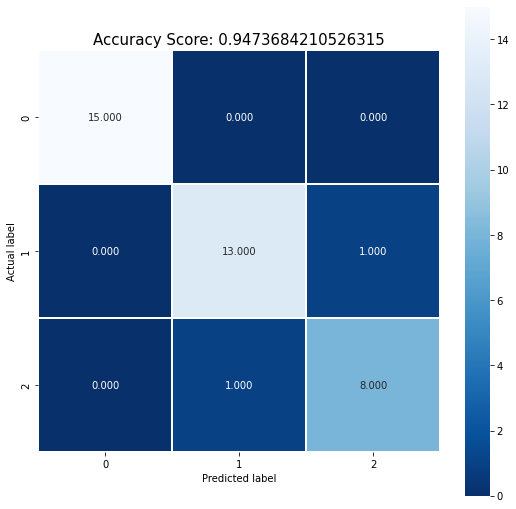

In [80]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test3, y_pred3), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(x_test3, y_test3))
plt.title(all_sample_title, size = 15);

## Algorithm # 2 - KNN (K Nearest Neibhors)

## Scenario 1: Build a model using Sepal Attributes only

*   sepal length (cm)
*   sepal width (cm)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scalar = StandardScaler()

In [83]:
scalar.fit(X)

StandardScaler()

BT: Y data should have been merged with X data and the resulting XY table fitted for scalar adjustememt (not just the X data), but the Y data was given to us as a separate data frame in this exersise.  

In [84]:
X_scaled = scalar.transform(X)

BT: Note that X represents only two variables:  septal length (cm) and septal width (cm) as specified above in the Logistic Regression model. 

In [90]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(X_scaled, Y)

In [91]:
print(x_train4.shape)
print(x_test4.shape)
print(y_train4.shape)
print(y_test4.shape)

(112, 2)
(38, 2)
(112,)
(38,)


In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn = KNeighborsClassifier(n_neighbors=3)

In [125]:
knn.fit(x_train4, y_train4)

KNeighborsClassifier(n_neighbors=3)

In [126]:
y_pred4 = knn.predict(x_test4)

In [127]:
y_pred4

array([0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0,
       0, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1])

In [128]:
cm4 = confusion_matrix(y_test4, y_pred4)
cm4

array([[11,  1,  0],
       [ 0,  8,  6],
       [ 0,  5,  7]])

In [129]:
score = knn.score(x_test4, y_test4)

In [130]:
score

0.6842105263157895

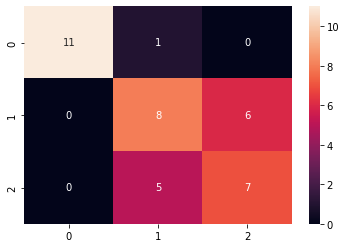

In [131]:
sns.heatmap(cm4, annot=True, fmt='0.0f')

In [132]:
print(classification_report(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.57      0.57      0.57        14
           2       0.54      0.58      0.56        12

    accuracy                           0.68        38
   macro avg       0.70      0.69      0.70        38
weighted avg       0.70      0.68      0.69        38



BT Conclusion: The f1 score of .61 in the KNN model is considerably less than the .79 in the Logistic Regression model when septal length and width were the only variables used to predict flower name and a knn = 1 was used. The f1 score changed from .61 to .68  to .66 when knn was changed from 1 to 3 to 5. 

## Scenario 2: Build a model using Petal Attributes only

*   petal length (cm)
*   petal width (cm)

In [152]:
scalar.fit(X2, Y2)

StandardScaler()

In [153]:
X_scaled2 = scalar.transform(X2)

BT: note that X2 was defined above as petal length (cm) and petal width (cm). 

In [154]:
Y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [155]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(X_scaled2, Y2)

In [156]:
print(x_train5.shape)
print(x_test5.shape)
print(y_train5.shape)
print(y_test5.shape)

(112, 2)
(38, 2)
(112,)
(38,)


In [157]:
knn = KNeighborsClassifier(n_neighbors=3)

In [158]:
knn.fit(x_train5, y_train5)

KNeighborsClassifier(n_neighbors=3)

In [166]:
y_pred5 = knn.predict(x_test5)

In [167]:
y_pred5

array([0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 0,
       1, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 1])

In [168]:
cm5 = confusion_matrix(y_test5, y_pred5)
cm5

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 12]])

In [169]:
score5 = knn.score(x_test5, y_test5)

In [170]:
score5

0.9736842105263158

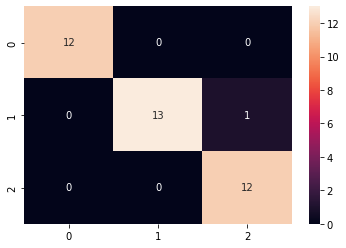

In [171]:
sns.heatmap(cm5, annot=True, fmt='0.0f')

In [172]:
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



BT Conclusion: In the KNN Model, petal length and width were more accurate predictors of flower name than sepal length and width, as indicated by the f1 score of .97 vs .68, respectively. 

## Scenario 3: Build a model using Sepal and Petal Attributes (all attributes)

*   sepal length (cm)
*   sepal width (cm)
*   petal length (cm)
*   petal width (cm)

In [173]:
scalar.fit(X3, Y3)

StandardScaler()

BT: X3 and Y3 were defined in the Logistic Regression model above as holding both sepal and petal lengths and widths. 

In [175]:
X_scaled3 = scalar.transform(X3)

In [176]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(X_scaled3, Y3)

In [177]:
print(x_train6.shape)
print(x_test6.shape)
print(y_train6.shape)
print(y_test6.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [178]:
knn = KNeighborsClassifier(n_neighbors=3)


In [179]:
knn.fit(x_train6, y_train6)

KNeighborsClassifier(n_neighbors=3)

In [180]:
y_pred6 = knn.predict(x_test6)

In [182]:
cm6 = confusion_matrix(y_test6, y_pred6)
cm6

array([[12,  1,  0],
       [ 0, 11,  2],
       [ 0,  0, 12]])

In [183]:
score6 = knn.score(x_test6, y_test6)

In [184]:
score6

0.9210526315789473

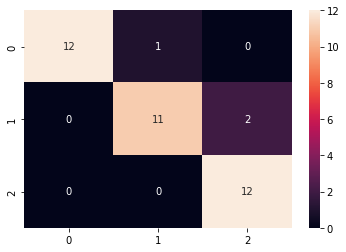

In [185]:
sns.heatmap(cm6, annot=True, fmt='0.0f')

In [186]:
print(classification_report(y_test6, y_pred6))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      0.85      0.88        13
           2       0.86      1.00      0.92        12

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38



BT Conclusion: Adding sepal width and length to petal width and length decreased the accuracy of the KNN model in predicting petal name, as indicated by the f1 score, which was .97 when petal with and length were used, but .92 when petal and sepal widths and lengths were used. 

# Bonus Points: Decision Tree

## Build decision tree for Scenario 2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus, graphviz
from sklearn import tree
from IPython.display import Image

In [ ]:
# hint
# choose decision tree max depth=2
# X= iris_data.data[:,2:]
# y=iris_data.target
# dot_img = tree.export_graphviz(dt_clf,out_file='iris_tree.dot',feature_names=iris_data.feature_names[2:],class_names=iris_data.target_names,filled=True,rounded=True)
# tree_graph = pydotplus.graph_from_dot_file('iris_tree.dot')
# Image(tree_graph.create_png())

Print Decision Tree and write your interpretation for it

# Model Comparison

# Model Selection

# Summary and Conclusion